## Q1: 

**What are the most common delays? Do they occur often?**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#copying over the data cleaning from the Data_Collection_Cleaning file
delayed_df = pd.read_csv("../raw_data/delayed.csv")

delayed_df = delayed_df.dropna()

delayed_df['month'] = pd.to_datetime(delayed_df['month']).dt.normalize()
delayed_df['division'] = delayed_df['division'].astype(str)
delayed_df['line'] = delayed_df['line'].astype(str)
delayed_df['day_type'] = delayed_df['day_type'].astype(str)
delayed_df['incidents'] = delayed_df['incidents'].astype(int)
delayed_df['reporting_category'] = delayed_df['reporting_category'].astype(str)

delayed_df['division'] = delayed_df['division'].str.strip().str.upper()
delayed_df['line'] = delayed_df['line'].str.strip().str.upper()
delayed_df['day_type'] = delayed_df['day_type'].str.strip().str.upper()
delayed_df['reporting_category'] = delayed_df['reporting_category'].str.strip().str.upper()

delayed_df

,month,division,line,day_type,incidents,reporting_category
1,2024-01-01,A DIVISION,1,1,31,CREW AVAILABILITY
2,2024-01-01,A DIVISION,1,1,2,EXTERNAL FACTORS
3,2024-01-01,A DIVISION,1,1,92,INFRASTRUCTURE & EQUIPMENT
4,2024-01-01,A DIVISION,1,1,86,OPERATING CONDITIONS
5,2024-01-01,A DIVISION,1,1,49,PLANNED ROW WORK
...,...,...,...,...,...,...
3761,2024-12-01,B DIVISION,S ROCK,2,16,EXTERNAL FACTORS
3762,2024-12-01,B DIVISION,S ROCK,2,6,INFRASTRUCTURE & EQUIPMENT
3763,2024-12-01,B DIVISION,S ROCK,2,1,OPERATING CONDITIONS
3764,2024-12-01,B DIVISION,S ROCK,2,1,PLANNED ROW WORK


In [14]:
x = delayed_df.groupby('reporting_category')['incidents'].sum().sort_values(ascending=False)
x

reporting_category
POLICE & MEDICAL              22197
OPERATING CONDITIONS          17619
INFRASTRUCTURE & EQUIPMENT    17063
PLANNED ROW WORK              14228
CREW AVAILABILITY              5229
EXTERNAL FACTORS               1628
Name: incidents, dtype: int32

In [50]:
pd.set_option('display.max_rows', 10)

monthly = (
    delayed_df
    .groupby(['month', 'reporting_category'])['incidents']
    .sum()
    .reset_index()
)

monthly.sort_values(['month', 'incidents'], ascending=[True, False]).reset_index(drop=True)

,month,reporting_category,incidents
0,2024-01-01,POLICE & MEDICAL,1859
1,2024-01-01,OPERATING CONDITIONS,1836
2,2024-01-01,INFRASTRUCTURE & EQUIPMENT,1467
3,2024-01-01,PLANNED ROW WORK,1117
4,2024-01-01,CREW AVAILABILITY,462
...,...,...,...
67,2024-12-01,INFRASTRUCTURE & EQUIPMENT,1584
68,2024-12-01,OPERATING CONDITIONS,1146
69,2024-12-01,PLANNED ROW WORK,1052
70,2024-12-01,CREW AVAILABILITY,448


## Data Visualization

In [20]:
pivoted = daily.pivot(index='month', columns='reporting_category', values='incidents')

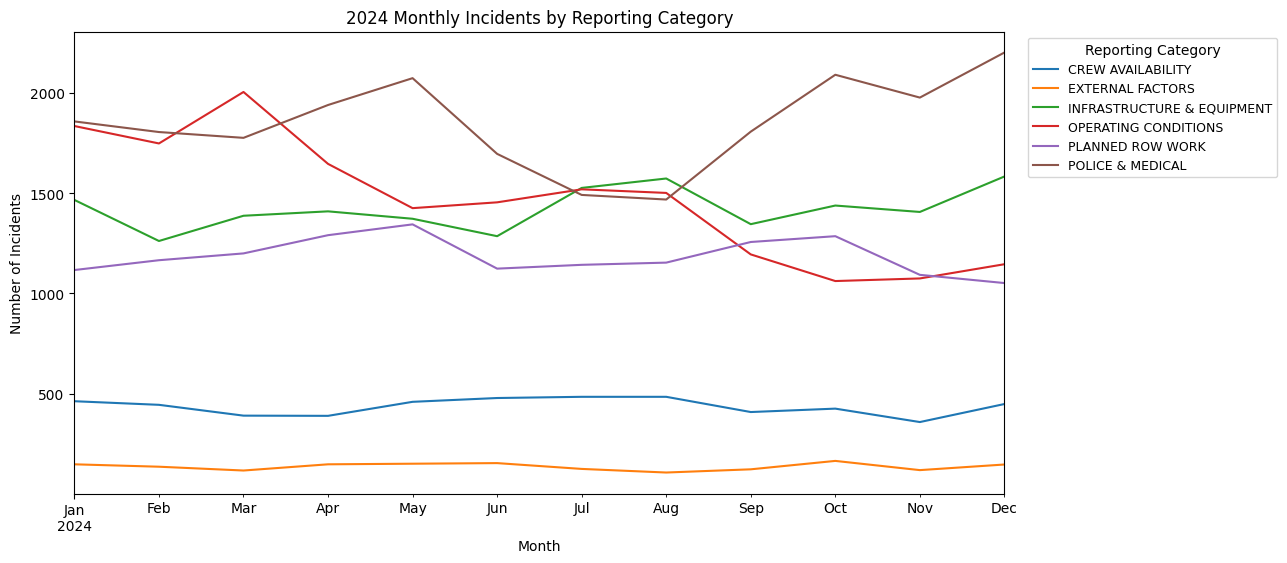

In [49]:
pivoted.plot(figsize=(12,6))
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.title("2024 Monthly Incidents by Reporting Category")
plt.legend(title="Reporting Category", fontsize=9, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

## Data Analysis

After summing the total incidents per reporting category, "Police & Medical" is the overall the most common delay and occured 22,197 times during 2024; however this changes month to month. As seen in the vizualization, "Operating Conditions" was the main cause for delays in March 2024, and "Infrastructure & Equipment" and "Operating Conditions" in between July and August 2024. 

"Crew Availability" and "External Factors" were the least common causes of delay in 2024. 

Because these reporting categories are vague, we do not know exactly what caused the delays. 

Some assumptions as to why "Police and Medical" were the most common delays in 2024 is the high volume of daily riders in NYC, which naturally increases the likelihood of medical emergencies and other safety-related incidents. Police respond to a wide range of situations across the subway system—including medical emergencies, track intrusions, large events that create crowding, crime-related investigations, and general rule enforcement. Because these incidents require immediate attention to protect passenger safety, they often lead to temporary service pauses, contributing to the higher number of delays in this category.